In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
print('iris_dataset의 키 :\n', iris_dataset.keys())

iris_dataset의 키 :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:193]+ '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print('타깃의 이름', iris_dataset['target_names'])

타깃의 이름 ['setosa' 'versicolor' 'virginica']


In [7]:
print('특성의 이름', iris_dataset['feature_names'])

특성의 이름 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print('data의 타입', type(iris_dataset['data']))

data의 타입 <class 'numpy.ndarray'>


In [9]:
print('data의 크기:', iris_dataset['data'].shape)

data의 크기: (150, 4)


In [15]:
print('data의 처음 다섯 행:\n', iris_dataset['data'][:5])

data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
print('target의 타입:', type(iris_dataset['target']))

target의 타입: <class 'numpy.ndarray'>


In [17]:
print('target의 크기:', iris_dataset['target'].shape)

target의 크기: (150,)


In [18]:
print('타깃:\n', iris_dataset['target'])

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [26]:
print('X_train의 크기:', X_train.shape)
print('y_train의 크기:', y_train.shape)
print('X_test의 크기:', X_test.shape)
print('y_test의 크기:', y_test.shape)

X_train의 크기: (112, 4)
y_train의 크기: (112,)
X_test의 크기: (38, 4)
y_test의 크기: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FBE468C08>,
      dtype=object)

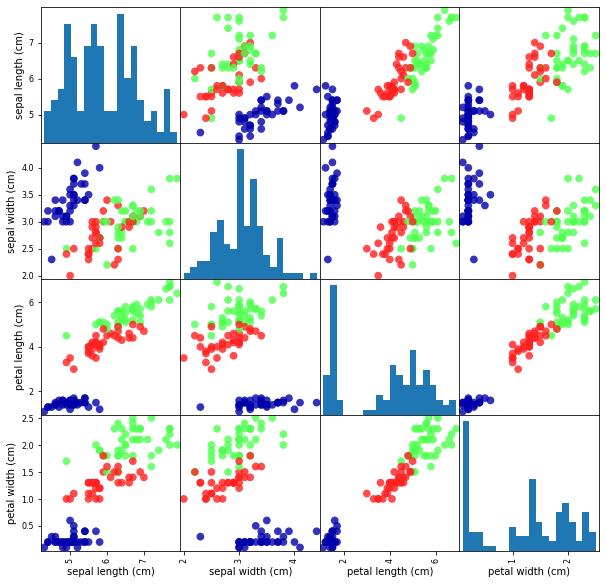

In [27]:
#X_train 데이터를 사용해서 데이터프레임을 만듭니다.
#열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [28]:
#K-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
#예측하기
X_new=np.array([[5,2.9,1,0.2]])
print('X_new.shape:', X_new.shape)

X_new.shape: (1, 4)


In [34]:
prediction=knn.predict(X_new)
print('예측:', prediction)
print('예측한 타깃의 이름:', iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [36]:
#모델 평가하기
y_pred=knn.predict(X_test)
print('테스트 세트에 대한 예측값:\n', y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [37]:
print('테스트 세트의 정확도: {:.2f}'.format(np.mean(y_pred==y_test)))

테스트 세트의 정확도: 0.97


In [38]:
#knn 객체의 score 메서드로 테스트 세트의 정확도 계산하기
print('테스트세트의 정확도 : {:.2f}'.format(knn.score(X_test,y_test)))

테스트세트의 정확도 : 0.97
